# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 1: NumPy ##

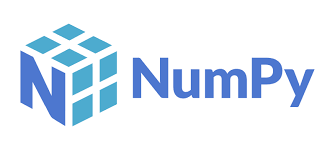

# Review

Before we start, let's have a quick recap of the lecture.

## NumPy
NumPy is a popular open-source Python package for scientific computing and is often used in machine learning research. But to know why it is so, we need to define vectorization.

## Vectorization
In NumPy, vectorization <font color='red'>means not using explicit `for` loop or `while` loop and indexing</font>. (It doesn't mean we don't index, we just don't often index inside a `for` loop or `while` loop to access the elements). In this way, the code would look nicer and easier to understand. According to [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html), it is also "more concise and closely resembles standard mathematical notation". Here's an example to demonstrate the idea.

Suppose we perform the sum of products using a for-loop:

```python
acc = 0                 # Set accumulator to 0
for a, b in zip(x, y):  # Suppose we have two containers x and y with the same length, and we do parallel iteration
    acc += a * b        # Compute the sum of products
```
The same idea can actually be implemented by doing vectorization using NumPy as follows:
</p>

```python
acc = (x * y).sum()     # Compute the sum of products using NumPy
```
<p align="justify">
Note that the latter version is shorter, easy to read and understand, and much cleaner.

Another benefit of vectorization is that it allows optimizations. NumPy can perform the operations much faster because NumPy contains pre-compiled binaries, which significantly speed up the calculations. You can run the following code to compare.

In [1]:
import time

"""
    Calculate sum of products using generic Python List and for loop
"""
x = list(range(1000000))  # Create a list of integers, 0, 1, 2, ..., 999999
y = list(range(1000000))  # Create another list of integers, 0, 1, 2, ..., 999999
acc = 0                   # Define accumulator and set it to 0
start_time = time.time()  # Start the timer and keep the time
for a, b in zip(x, y):
    acc += a * b          # Accumulate x * y to count
print(acc)                # Print the count
end_time = time.time()    # Stop the timer and keep the time
print(f'The operation took {end_time - start_time} seconds') # Print the time duration

333332833333500000
The operation took 0.08013081550598145 seconds


In [2]:
import numpy as np

"""
    Calculate sum of products using NumPy array and functions
"""
x = np.arange(1000000)    # Create a NumPy array of integers, 0, 1, 2, ..., 999999
y = np.arange(1000000)    # Create another NumPy array of integers, 0, 1, 2, ..., 999999
start_time = time.time()  # Start the timer and keep the time
acc = (x * y).sum()       # Element-wise multiplication of array x and y, then sum all the elements on the resultant array
print(acc)                # Print the count
end_time = time.time()    # Stop the timer and keep the time
print(f'The operation took {end_time - start_time} seconds') # Print the time duration

584144992
The operation took 0.00801992416381836 seconds


The above example shows that the code written in NumPy runs significantly faster than the one written using the Python list while obtaining the same result. A golden rule to remember is <font color="red">avoiding using loops</font> but trying to write in NumPy or using machine learning libraries. However, there are cases that we might need to use for/while loop, but it is very rare.

NumPy also provides many useful functions for getting statistics, such as  [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [median](https://numpy.org/doc/stable/reference/generated/numpy.median.html), [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), etc. Also, many other functions, like generating [random numbers](https://numpy.org/doc/stable/reference/random/index.html), are very important and useful for scientific research, especially machine learning.

# Array

All NumPy array is under the class `numpy.ndarray`. Compared to List in Python, there isn't much difference except <font color="red">the length of `numpy.ndarray` is fixed when it is created</font>.

`numpy.array` and `List` can store anything we assign to it. However, one important thing is that most of the <font color="red">operations in NumPy require the array to have numerical types</font>. Another problem with such versatility is that some operations might require a specific data type. If we don't take extra precautions to the data types of the array, it could cause catastrophic results. (Imagine you have run your program for two days only to find that the data type is wrong and the result is garbage.) The following shows an example.


In [3]:
class EmptyClass:
    pass # The pass statement is used as a placeholder for future code

x = np.array([1,2,3, EmptyClass()])
print(f'The type of numpy array is {type(x)}')
print(f'The data type of the array is {x.dtype}')
x + 1  # This line causes an error!

The type of numpy array is <class 'numpy.ndarray'>
The data type of the array is object


TypeError: unsupported operand type(s) for +: 'EmptyClass' and 'int'

## Creating a NumPy array

NumPy provides many functions to create arrays. Here are some examples:


In [4]:
# A function to print the array content and its shape
def print_array(arr):
    print(f'Content of the array\n{arr}\nShape of the array {arr.shape}')
    print()


a = np.array([[1, 2, 3], [2, 3, 4]])  # Create array from other iterables (e.g. List)
b = np.ones_like(a)     # Create array with same shape and same type as a, but filled with integer 1
c = np.zeros(a.shape)   # Create array with shape of other array
# no letter e! no zeroes!
d = np.ones((3, 3, 3))  # Create array with provided shape (3, 3, 3)
e = np.arange(10)       # Create array with 10 consective numbers starting from 0
# arange should only be used for integers, for floating point numbers use np.linspace
print_array(a)
print_array(b)
print_array(c)
print_array(d)
print_array(e)

Content of the array
[[1 2 3]
 [2 3 4]]
Shape of the array (2, 3)

Content of the array
[[1 1 1]
 [1 1 1]]
Shape of the array (2, 3)

Content of the array
[[0. 0. 0.]
 [0. 0. 0.]]
Shape of the array (2, 3)

Content of the array
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
Shape of the array (3, 3, 3)

Content of the array
[0 1 2 3 4 5 6 7 8 9]
Shape of the array (10,)


## Attributes of NumPy array

As shown above, we have accessed the attribute <font color="red">``shape``</font> of the array. It shows the <font color="red">number of elements on each axis</font>. Later in the lab, when we mention the first axis, or the n-th axis, it would be derived from this attribute. This also shows the order of the dimension when you're indexing the array, which will be discussed later.

Other attributes of the array include,

-   ndim   (Number of array dimensions)
-   dtype  (Data-type of the array's elements)
-   etc.


In [6]:
a = np.arange(6)
print(a)
print(a.shape)  # shape is not a function!  Don't call a.shape()
print(a.ndim)
print(a.dtype)

# What is the shape of the following numpy array?
haha = np.array([8, 1, 5, 0])
# haha.shape = ... ?
print(haha.shape)

[0 1 2 3 4 5]
(6,)
1
int32
(4,)


You can refer to the lecture notes or look into the [official tutorial of NumPy](https://numpy.org/doc/stable/user/basics.creation.html) for functions that can be used to create new arrays.

## Indexing

NumPy supports the Pythonic way to index ndarray arrays.


In [7]:
import numpy as np

a = np.arange(100)  # Create a NumPy array with values, 0, 1, 2, ..., 99
print('The second element:', a[1])
print('The last element:', a[-1])
print('Select from index 10 to 20 (exclusive):', a[10:20])
print('Select from index 0 to 10 (exclusive):', a[:10])
print('Select from index 90 to the end of the list:', a[90:])
print('Select from index 10 (count from the end of list) to the end of list:', a[-10:])
print('Select from the start of list to the end of list:\n', a[:])
print('Select from index 1 to 7 (exclusive) with increment 2:', a[1:7:2])
print('Select from index 7 to 1 (exclusive) with increment -1:', a[7:1:-1])


The second element: 1
The last element: 99
Select from index 10 to 20 (exclusive): [10 11 12 13 14 15 16 17 18 19]
Select from index 0 to 10 (exclusive): [0 1 2 3 4 5 6 7 8 9]
Select from index 90 to the end of the list: [90 91 92 93 94 95 96 97 98 99]
Select from index 10 (count from the end of list) to the end of list: [90 91 92 93 94 95 96 97 98 99]
Select from the start of list to the end of list:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Select from index 1 to 7 (exclusive) with increment 2: [1 3 5]
Select from index 7 to 1 (exclusive) with increment -1: [7 6 5 4 3 2]


When there is more than one dimension, we can either do `a[0][1]` like regular Python code or `a[0, 1]`. The axis here has the same order as what the `shape` attribute shows.


In [ ]:
a = np.arange(1000).reshape(10, 10, 10)
print(a[5, 2:6, 1:3])
print(a[3:5, ...].shape)  # We can use ... to select all other dimensions


[[521 522]
 [531 532]
 [541 542]
 [551 552]]
(2, 10, 10)


Let's try some exercises.

In [ ]:
import numpy as np
arr = np.arange(0, 50).reshape(5, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

Given the array above, can you slice it correctly?

In [ ]:
# how to select the vertical column 5, 15, ...?
# output: [ 5, 15, 25, 35, 45]


In [ ]:
# how to select the vertical column 5, 15, ..., but this time preserving the shape?
# output: [[ 5],
#          [15],
#          [25],
#          [35],
#          [45]]


In [ ]:
# how to select the following?
# output: [[13, 14, 15],
#          [23, 24, 25],
#          [33, 34, 35]]


In [ ]:
# how to select the same array, but with all the odd numbers removed?
# output: [[ 0,  2,  4,  6,  8],
#          [10, 12, 14, 16, 18],
#           ...
#          [40, 42, 44, 46, 48]]


In [ ]:
# how to select the same array, but with all the even numbers removed?
# output: [[ 1,  3,  5,  7,  9],
#          [11, 13, 15, 17, 19],
#           ...
#          [41, 43, 45, 47, 49]]


## Integer Array Indexing

Besides the Pythonic way of indexing (slicing) NumPy arrays, there's a more advanced way to index NumPy arrays using **integer** arrays. (Could be a list or numpy.ndarray with integer dtype)


![](https://i.stack.imgur.com/h1alT.jpg)

In [ ]:
a = np.arange(6).reshape(3, 2)  # a = [ [0, 1],
                                #       [2, 3],
                                #       [4, 5] ]
print(a)
print(a[[0, 1, 2], [0, 1, 0]])  # Select from index 0, 1, 2 at the first axis and index 0, 1, 0 from the second axis

[[0 1]
 [2 3]
 [4 5]]
[0 3 4]


Let's try some exercises.

In [ ]:
import numpy as np
arr = np.arange(0, 50).reshape(5, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

Given the array above, can you index the required elements correctly?

In [ ]:
# how to select the rows [10, 11, ...] and the rows [40, 41, ...]?
# output: [[10, 11, 12, ..., 19],
#          [40, 41, 42, ..., 49]]


In [ ]:
# how to select the entries divisible by 5?
# output: [[ 0,  5],
#          [10, 15],
#          [20, 25],
#          [30, 35],
#          [40, 45]]


In [ ]:
# how to swap the first and last row?
# output: [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
#          [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
#          [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
#          [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
#          [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]])


In [ ]:
# how to select the diagonal [0, 11, 22, 33, 44]?
# output: [0, 11, 22, 33, 44]


In [ ]:
# how to select the reverse diagonal [40, 31, 22, 13, 4]?
# output: [40, 31, 22, 13, 4]


In [ ]:
# how to select every other row and every other column?
# output: [[ 0,  2,  4,  6,  8],
#          [20, 22, 24, 26, 28],
#          [40, 42, 44, 46, 48]]


In [ ]:
# how to select the following "step" diagonal?
# output: [[ 0,  1],
#          [11, 12],
#          [22, 23],
#          [33, 34],
#          [44, 45]]


In [ ]:
# how to reverse the entries of each row?
# output: [[ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
#          [19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
#          [29, 28, 27, 26, 25, 24, 23, 22, 21, 20],
#          [39, 38, 37, 36, 35, 34, 33, 32, 31, 30],
#          [49, 48, 47, 46, 45, 44, 43, 42, 41, 40]])


In [ ]:
# how to reverse the entries of each column?
# output: [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
#          [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
#          [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
#          [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
#          [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]])


In [ ]:
# Construct the following array without using np.eye(...)
# output: [[1, 0, 0, 0, 0],
#          [0, 1, 0, 0, 0],
#          [0, 0, 1, 0, 0]]


The indexing methods above allow us to easily copy and amend the values without writing long codes.

## Boolean Array Indexing

We can also use True and False to choose individual values. However, this is probably more useful when combining it with [logic functions](https://numpy.org/doc/stable/reference/routines.logic.html) from NumPy.


In [ ]:
a = np.arange(12).reshape(3, 4)  # [ [0 1 2 3]
                                 #   [4 5 6 7]
                                 #   [8 9 10 11] ]
selection = np.array([[True, True, True, False],
                      [True, True, True, True],
                      [False, True, False, False]])
print(a[selection])  # Boolean Array Indexing

[0 1 2 4 5 6 7 9]


In [ ]:
# a = [ [0 1 2 3]
#       [4 5 6 7]
#       [8 9 10 11] ]
selection1 = a < 6   # Comparison, return a 2D array with True value for those entry values < 6, and False otherwise
selection2 = a > 10  # Comparison, return a 2D array with True value for those entry values > 10, and False otherwise
selection = np.logical_or(selection1, selection2)  # Logical OR, return a 2D array with True value for those entry value < 6 OR value > 10, false otherwise
selection = selection1 | selection2  # Same as the previous line
print(selection)

a[selection]

[[ True  True  True  True]
 [ True  True False False]
 [False False False  True]]


array([ 0,  1,  2,  3,  4,  5, 11])

Let's try some exercises.

In [ ]:
import numpy as np
arr = np.arange(0, 50).reshape(5, 10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

Given the above array, can you generate the correct arrays as required below?

In [ ]:
# how to change each value divisible by 3 into -1?
# output: [[-1,  1,  2, -1,  4,  5, -1,  7,  8, -1],
#          [10, 11, -1, 13, 14, -1, 16, 17, -1, 19],
#          [20, -1, 22, 23, -1, 25, 26, -1, 28, 29],
#          [-1, 31, 32, -1, 34, 35, -1, 37, 38, -1],
#          [40, 41, -1, 43, 44, -1, 46, 47, -1, 49]]


In [ ]:
# how to generate a boolean mask of arr, where each entry is TRUE if the entry is divisible by 3, and false otherwise?
# output: [[ True, False, False,  True, False, False,  True, False, False,  True],
#          [False, False,  True, False, False,  True, False, False,  True, False],
#          [False,  True, False, False,  True, False, False,  True, False, False],
#          [ True, False, False,  True, False, False,  True, False, False,  True],
#          [False, False,  True, False, False,  True, False, False,  True, False]]


In [ ]:
# in the above array, how to change the TRUE entries to 1 and FALSE entries to 0?
# output: [[1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
#          [0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
#          [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
#          [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
#          [0, 0, 1, 0, 0, 1, 0, 0, 1, 0]]


In [ ]:
# how about changing TRUE entries to 0 and FALSE entries to 1 instead?  This time can you do it in one line of code?
# output: [[0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
#          [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
#          [1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
#          [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
#          [1, 1, 0, 1, 1, 0, 1, 1, 0, 1]]


In [ ]:
# how to select all values that are divisible by 3?
# output: [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]


In [ ]:
# Key learning points:
# What are the differences between these?
# A) arr % 3
# B) arr % 3 == 0
# C) arr[arr % 3 == 0]
# D) arr[arr % 3 == 0] = 1
# E) how to turn boolean arrays to arrays with 1s and 0s

## Data types

NumPy array has a type. NumPy usually decides the array type for us, but sometimes we might want to declare or convert the datatype of the array. E.g.  indexing an array.


In [ ]:
class empty:
    pass


print(np.array([1, 2]).dtype)      # All elements are of type int
print(np.array([1, 2, 3.]).dtype)  # The first two elements are of type int, and the third element is of type float, float is a more general type than int
print(np.array([1, 2, 3., "https://www.youtube.com/watch?v=dQw4w9WgXcQ", empty()]).dtype)  # <object> is the most general type in Python

int64
float64
object


In [ ]:
a = np.arange(10)                   # a = [0 1 2 3 4 5 6 7 8 9]
b = np.arange(10, dtype=np.float32) # b = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0]

print(a[b[:5].astype(np.int32)])    # Select from index 0 to 5 (exclusive) and convert them to int32
a[b]  # Index a using b, but b is of type float32, so error is raised

[0 1 2 3 4]


IndexError: ignored

## Array Arithmetic

NumPy supports elementwise arithmetic operations (+, -, \*, /) and basic matrix operations (e.g. dot product, transpose. It's okay if you don't know what these are at this point).


In [ ]:
a = np.arange(6).reshape(2, 3)        # a = [ [0 1 2]
                                      #       [3 4 5] ]
b = np.arange(10, 16).reshape(2, 3)   # b = [ [10 11 12]
                                      #       [13 14 15] ]
print(a + b)
print(a @ b.T)  # a @ b.T is equivalent to np.dot(a, b.T). This is called matrix multiplication where b.T is the transpose of b.
                # (Again, not necessary for you to know what this means exactly at this point)

[[10 12 14]
 [16 18 20]]
[[ 35  44]
 [134 170]]


## NumPy Functions

NumPy provides many different functions for performing computations on arrays. A few useful ones are
- `np.sum(...)`
- `np.min(...)`
- `np.hstack(...)`
- `np.vstack(...)`
- `np.newaxis(...)`
- `np.expand_dims(...)`


np.sum(...), np.min(...)

In [ ]:
a = np.arange(6).reshape(2, 3)  # a = [ [0 1 2]
                                #       [3 4 5] ]
print(a)
print(np.sum(a))      # Find the sum of all the elements
print(a.sum())        # This is equivalent to the previous line
print(a.sum(axis=0))  # Find the sum along the first axis, i.e., the vertical axis, (0+3), (1+4), (2+5)
print(a.sum(axis=1))  # Find the sum along the second axis, i.e., the horizontal axis, (0+1+2), (3+4+5)

print(a.min())        # Find the min for the whole array
print(a.min(axis=0))  # Find the min along the first axis
print(a.min(axis=1))  # Fine the min along the second axis


[[0 1 2]
 [3 4 5]]
15
15
[3 5 7]
[ 3 12]
0
[0 1 2]
[0 3]


In [ ]:
# Axis for summing up
# Given an array with SHAPE (5, 7, 3, 2, 9)
# Many functions in numpy allow you to specify the 'axis' to sum up along, for example
# np.sum(axis=...)
# the way to understand it is numpy 'sums' along those axes, so in the output shape that number with disappear
test = np.zeros((5, 7, 3, 2, 9))
test.sum(axis=2) # -> output shape is (5, 7, 2, 9)

# most numpy functions also allow you to call them in two ways:
# arr.sum(axis=0)
# np.sum(arr, axis=0)


# how to remove the axis with shape size 2?
# output shape: (5, 7, 3, 2, 9)

# how to remove more than one dimension?
# output shape: (5, 7, 9)

# how to preserve the axis?
# output shape: (5, 7, 1, 1, 9)


(5, 7, 1, 1, 9)

In [ ]:
a = np.linspace(1,3,10) # Return evenly spaced numbers over a specified interval
print(a)

[1.         1.22222222 1.44444444 1.66666667 1.88888889 2.11111111
 2.33333333 2.55555556 2.77777778 3.        ]


np.vstack(...), np.hstack(...)

if you want to concatenate two arrays and not just add them, you can perform it using two ways – vertical stacking and horizontal stacking

In [ ]:
a = np.arange(6).reshape(2,3)   # a=[[0 1 2]
                                #    [3 4 5]]
b = np.arange(10,16).reshape(2,3)   # b=[[10 11 12]
                                    #    [13 14 15]]
print(np.vstack((a,b)))
print(np.hstack((a,b)))

[[ 0  1  2]
 [ 3  4  5]
 [10 11 12]
 [13 14 15]]
[[ 0  1  2 10 11 12]
 [ 3  4  5 13 14 15]]


np.newaxis(...), np.expand_dims(...)

In [ ]:
import numpy as np
a = np.array([0, 1, 2, 3]) # shape (4,)

print(np.expand_dims(a, axis=0))  # shape (1, 4)
print(np.expand_dims(a, axis=1))  # shape (4, 1)
print(np.expand_dims(a, axis=(0, 1, 2)).shape)  # shape (1, 1, 1, 4)
print(np.expand_dims(a, axis=(0, 1, 3)).shape)  # shape (1, 1, 4, 1)

print(a[np.newaxis, :])  # equivalent to np.expand_dims(a, axis=0)
print(a[:, np.newaxis])  # equivalent to np.expand_dims(a, axis=1)

## Broadcasting

<font color="red">Broadcasting</font> allows us to <font color="red">perform operations on arrays with different shapes</font>. This function greatly reduces the redundancy of our codes and makes them much more readable and shorter.

However, a few rules (and steps) exist for this to work. (You can also refer to notes if it's unclear)
1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length (pads 1s on the left side of the shape of the array that has fewer dimensions). Dimensions will be matched from the last dimension to the first dimension (according to attribute ```shape```).
2. During matching, the dimension could be matched if and only if,
   1. They are equal, or
   2. One of them is 1
3. The arrays can be broadcast together if they are compatible in all dimensions.
3. After broadacasting, each array behaves as if it had shape equal to the element-wise maximum of shapes of the two input arrays.
4. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension.


![](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [ ]:
import numpy as np

a = np.ones((2, 4, 3, 3))

b = np.ones((4, 3, 3))
_ = a + b  # Ok! Rule 1, b can match all if its dimensions to a from right to left

c = np.ones((4, 3, 1))
_ = a + c  # Ok! Rule 2.2, dimension can be matched if they're equal or one of them is 1



In [ ]:
a = np.ones((2, 4, 3, 3))

d = np.ones((2, 4, 3))
_ = a + d  # Error ! Rule 1, dimension is matched from the right to left


ValueError: operands could not be broadcast together with shapes (2,4,3,3) (2,4,3) 

In [ ]:
e = np.ones((2, 2, 3, 3))
_ = a + e  # Error! Rule 2, at the second dimension, the dimension is neither matched nor neither is 1

ValueError: operands could not be broadcast together with shapes (2,4,3,3) (2,2,3,3) 

In [ ]:
a = np.array([0,10,20,30])
b = np.array([1,2,3])
c = a[:,np.newaxis] + b # Add a new axis to a, so that a becomes [[0],[10],[20],[30]], then the addition is performed

print(c)
print(c.shape) # (4, 3) since input arrays have shapes (4,1) and (1,3) , following rule 4

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

![](https://numpy.org/doc/stable/_images/broadcasting_4.png)

In [ ]:
# how to generate the following array without using np.array(...)?
# output: [[0, 1, 2],
#          [0, 1, 2],
#          [0, 1, 2],
#          [0, 1, 2],
#          [0, 1, 2]]


## Array Transpose and Reshaping

In machine learning, most calculations are performed using multi-dimensional arrays. (Remember this as a fact, and you'll see it very soon in later labs.) And since each multi-dimension array contains many different values, operations on these arrays are also more complicated.

One of the most common errors we would encounter is the mismatching of shapes. For example, we can't perform addition on arrays with 4 elements and 5 elements. This is because there are no intuitive ways to add them together. If this happens, an error will be raised.


In [ ]:
import numpy as np
x = np.arange(4)  # [0 1 2 3]
y = np.arange(5)  # [0 1 2 3 4]
z = x + y

ValueError: ignored

To solve this problem, one way would be to write better code. The code above doesn't make any sense. However, sometimes altering the shape of the arrays could be intended and essential for some operations. Therefore, we need to know how to do it correctly.

To demonstrate the importance of choosing the correct functions, we will talk about `numpy.reshape` and `numpy.transpose`. However, there are still many more [array manipulating functions](https://numpy.org/doc/stable/reference/routines.array-manipulation.html). You can read the documentation if you want to know more.

In [ ]:
import numpy as np

x = np.arange(6).reshape((2,3))  # [ [0 1 2]
                                 #   [3 4 5] ]
y = np.arange(6).reshape((3,2))  # [ [0 1]
                                 #   [2 3]
                                 #   [4 5] ]
z = np.arange(6).reshape((3,2))  # [ [0 1]
                                 #   [2 3]
                                 #   [4 5] ]

print(x)
print(y.transpose((1,0)))  # Standard transpose of 2D array
print(z.reshape(2,3))      # Reshape z to a 2D array of 2 rows and 3 cols

[[0 1 2]
 [3 4 5]]
[[0 2 4]
 [1 3 5]]
[[0 1 2]
 [3 4 5]]


As you can see, while y and z started the same, they ended up being two very different arrays, even though they share the same shape. This is because, in the mathematical sense, a reshaped matrix is an entirely different matrix. There are, in fact, no such operations that resemble the functions of `reshape` in mathematics. However, transpose is an actual mathematical operation in linear algebra. It simply flips the matrix diagonally (draw a diagonal line from top left to bottom right and flip along that line).
$$
\begin{align}
    \begin{pmatrix}
    0 & 1 & 2 \\
    3 & 4 & 5 \\
    6 & 7 & 8
    \end{pmatrix} ^T =
    \begin{pmatrix}
    0 & 3 & 6 \\
    1 & 4 & 7 \\
    2 & 5 & 8
    \end{pmatrix}
\end{align}
$$

In [ ]:
print(y)
print(y.transpose(1, 0))

[[0 1]
 [2 3]
 [4 5]]
[[0 2 4]
 [1 3 5]]


You can also say transpose is to permutate the order of the dimension of the NumPy array, as demonstrated below.

In [ ]:
x = np.arange(8).reshape(2,2,2)   # x = [ [ [0 1]
                                  #         [2 3] ]
                                  #       [ [4 5]
                                  #         [6 7] ] ]
                                  # The 1st dimension refers to which layer,
                                  # the 2nd dimension refers to which row,
                                  # the 3rd dimension refers to which column
print(x[0, :, 0])                 # The second axis of x
x_1 = x.transpose((1, 0, 2))      # x_1 equals to swapping the first and second axis
print(x_1[:, 0, 0])               # The first axis of x_1

[0 2]
[0 2]


Let's work on some examples together.

In [ ]:
# generate an array with shape (8, 2, 5, 3) containing all zeros
arr = ...?

# what is the output shape after the following transposing?
arr_transposed = arr.transpose(1, 0, 2, 3)

# what is the output shape after the following sum?
arr_summed = arr.sum(axis=(1, 3))


## More on `reshape`

So you might ask, why do we need to reshape the array at all if most of the time it doesn't make any mathematical sense? One of the answers is that sometimes, the number of dimensions of the arrays is not enough. For example, we mentioned we could add a new axis using reshape. We can add however many axes we like to the array. The reshape would always be valid as long as the product of each axis is the same as the total amount of elements in the array. For example,

In [ ]:
x = np.arange(6)  # x = [0 1 2 3 4 5]
x.reshape((2, 3)) # Valid, x = [[ 0 1 2 ]
                  #             [ 3 4 5 ]]
x.reshape((6, 1)) # Valid, x = [[0]
                  #             [1]
                  #             [2]
                  #             [3]
                  #             [4]
                  #             [5]
                  #             [6]]
x.reshape((2, 3, 1, 1, 1, 1, 1, 1)) # Valid, and probably too much axes
x.reshape((2, 3, -1)) # Valid. -1 means let NumPy decide the size of that axis. What is the last dimension?
# x.reshape((3, 3))   # Invalid, 3x3=9, but only 6 elements are presented

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

# Conclusion

NumPy provides various functions to enable efficient scientific research and engineering calculations. It keeps the simplicity of Python while allowing users to do complex computation tasks. It is a very important and useful tool if you want to dive deeper into machine learning. Even though you might use other libraries in the future, many of the functions in NumPy are transferable.


In [ ]:
### This is the end of the review.
### Referenced from COMP2211 notes and NumPy official documentations